In [1]:
# Importa as bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# Gráficos do matplotlib interativos
%matplotlib notebook

In [3]:
# Faz a leitura dos dados

#dados = pd.read_csv('Dados_Flotacao_ConceicaoII_mod3.csv', sep=';')
#dados = pd.read_excel('Dados_Conceicao_Caixa_Alimentacao.xlsx')
dados = pd.read_excel('Marco02/CA_Densidade.xlsx')
target = pd.read_excel('T_Conceicao.xlsx')

In [10]:
# Armazena o tempo da primeira análise
t_inicial = target.iloc[0,0]

In [4]:
bkp = dados.copy()
bkp_t = target.copy()

In [5]:
# Transforma a primeira linha em cabeçalho
dados.columns = dados.iloc[0]

# Remove as duas primeiras linhas, que contêm cabeçalhos e nomes de TAGs
dados = dados.drop([0,1])

# Refaz a numeração do index
dados.reset_index(drop=True, inplace=True)

# Preenche os dados faltantes com zeros
dados = dados.fillna(0)

In [6]:
# Remove parte dos dados para diminuir o volume de informações para tratamento
#dados = dados[:10169]
#target = target[:38]

base = pd.Timestamp('2019-03-01')
base = base - np.timedelta64(2, 'h') ## Antes do primeiro, para que pegue todos os dados disponíveis
fim = pd.Timestamp('2019-03-03')
bkp_fim = fim

selecao = (dados.iloc[:,0] > base) & (dados.iloc[:,0] <= fim)
dados = dados[selecao]
selecao = (target.iloc[:,0] > base) & (target.iloc[:,0] <= fim)
target = target[selecao]

# Renomeia o cabeçalho de target
target.columns = ['DataHora', 'Ferro', 'Silica']

In [91]:
# Nome do parâmetro avaliado, encontrado no cabeçalho da segunda coluna do agrupamento
dados.columns[1]

# Seleciona duas colunas, formando um agrupamento com os dados de um parâmetro
nivel = dados.iloc[:,[0,1]]

# Retira os dados nulos
selecao = nivel.iloc[:,0] != 0
nivel = nivel[selecao]

In [ ]:
# Seleciona os dados para o primeiro intervalo de tempo
selecao = nivel.iloc[:,0] < t_inicial
primeiro = nivel[selecao]

In [ ]:
# Identifica o tipo de dado das colunas 'DataHora'
nivel.iloc[0,0]

In [ ]:
selecao = nivel.iloc[:,0] < t_inicial
primeiro = nivel[selecao]
primeiro

In [92]:
#my_index = pd.MultiIndex(levels=[[],[]],
#                         codes=[[],[]],
#                         names=[0,1])
# index=my_index, 
grupos = pd.DataFrame(columns=[col for col in nivel.columns])
i = 0
for amostra in target.iloc[:,0]:
    if nivel.shape[0] > 0:
        # Critério de seleção dos dados com base na data e hora
        selecao = nivel.iloc[:,0] < amostra
        # Seleciona o conjunto de dados
        selecionado = nivel[selecao]
        # Remove os dados da lista original
        nivel = nivel[~selecao]
        # Zera o índice para o grupo de dados selecionado
        selecionado.index = [j for j in range(selecionado.iloc[:,1].shape[0])]
        # Identifica o grupo
        selecionado['gr'] = [i for j in range(selecionado.iloc[:,1].shape[0])]
        
        grupos = grupos.append(selecionado, sort="False")
        i += 1
    
grupos['gr'] = grupos['gr'].astype(int)
#grupos.set_index('gr', append=True, inplace=True)

In [93]:
grupos.iloc[350:360]

,DataHora,Nível,gr
274,2019-01-01 02:26:54,84.7662,1
275,2019-01-01 02:27:19,85.1357,1
276,2019-01-01 02:27:24,83.7502,1
277,2019-01-01 02:28:09,81.6767,1
278,2019-01-01 02:28:14,80.6242,1
279,2019-01-01 02:28:44,83.1208,1
280,2019-01-01 02:28:54,81.6908,1
0,2019-01-01 02:29:39,81.3268,2
1,2019-01-01 02:29:54,83.6438,2
2,2019-01-01 02:30:19,82.6841,2


In [94]:
# Faz a contagem de quantos dados há em cada grupo
qnt = []
for i in range(grupos.gr.unique().shape[0]):
    qnt.append(grupos[grupos['gr'] == i].shape[0])

In [95]:
quant = np.asarray(qnt)

{'whiskers': [<matplotlib.lines.Line2D at 0x1eeadd52400>,
 'caps': [<matplotlib.lines.Line2D at 0x1eeadd52a90>,
 'boxes': [<matplotlib.lines.Line2D at 0x1eeb3b63fd0>],
 'medians': [<matplotlib.lines.Line2D at 0x1eeadd52eb8>],
 'fliers': [<matplotlib.lines.Line2D at 0x1eeadd294a8>],
 'means': []}

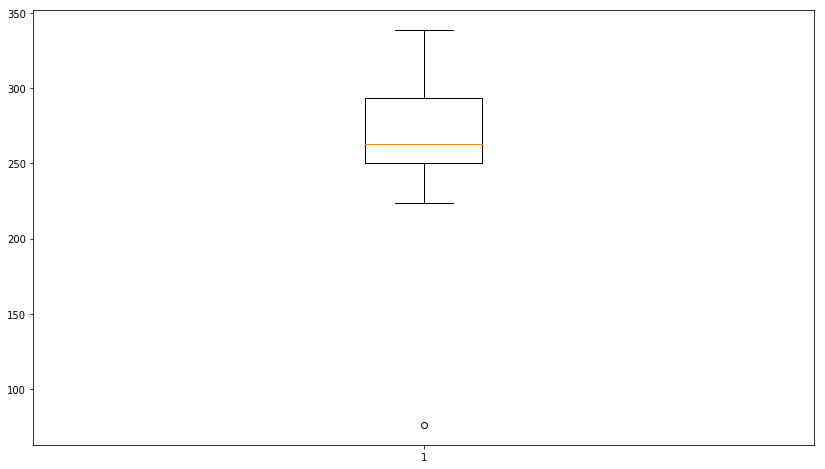

In [96]:
fig, axes = plt.subplots(1, 1, figsize=(14,8))
axes.boxplot(x=quant)

In [1]:
upper_quartile = np.percentile(quant, 75)
lower_quartile = np.percentile(quant, 25)

iqr = upper_quartile - lower_quartile
upper_whisker = quant[quant<=upper_quartile+1.5*iqr].max()
lower_whisker = quant[quant>=lower_quartile-1.5*iqr].min()

NameError: name 'np' is not defined

In [265]:
# Identifica o outlier
#pd.DataFrame(quant)

In [98]:
# Remove o outlier identificado
selecao = grupos['gr'] != 0
grupos = grupos[selecao]

target.drop(0, axis=0)

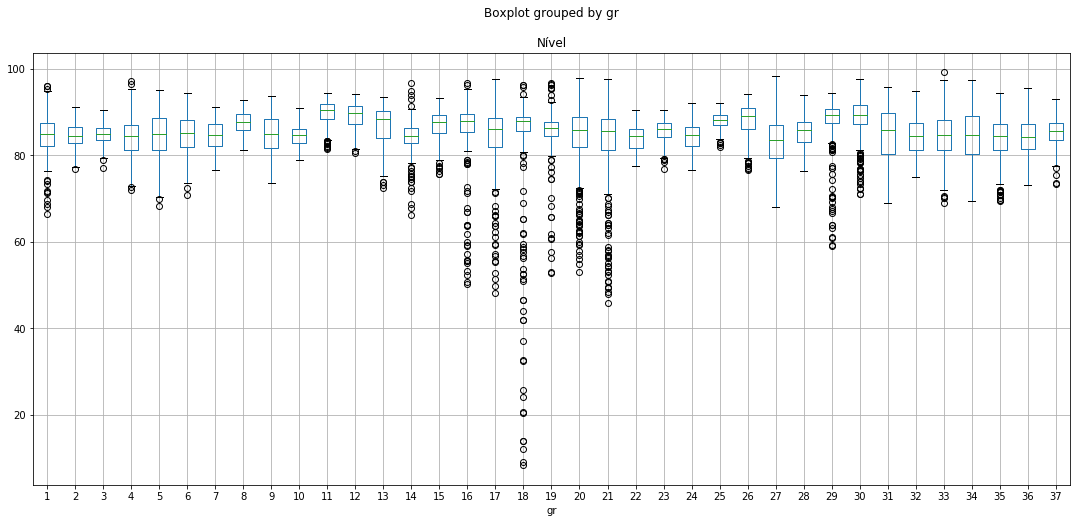

In [100]:
grupos.boxplot(['Nível'], by = 'gr', figsize=(18,8))

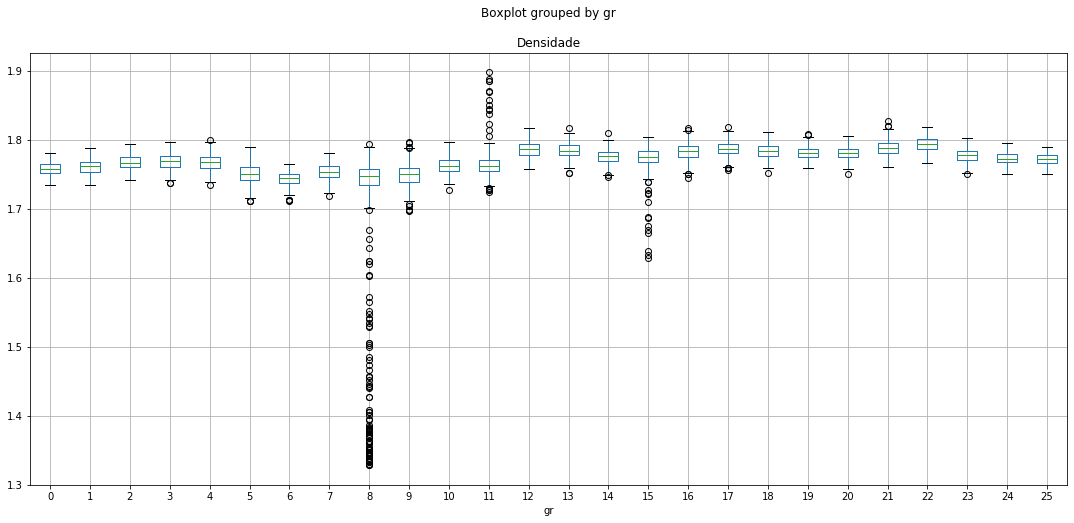

In [14]:
dados.boxplot(['Densidade'], by = 'gr', figsize=(18,8))

In [207]:
# Agrupamento dos dados em um só valor
## Média
media = []
for i in range(1,len(grupos.gr.unique())+1):
    media.append(grupos[grupos['gr'] == i]['Nível'].mean())
    
## Mediana
mediana = []
for i in range(1,len(grupos.gr.unique())+1):
    mediana.append(grupos[grupos['gr'] == i]['Nível'].median())

In [24]:
x = np.asarray(target.DataHora)
y = np.asarray(target.Ferro)

In [25]:
# Agrupamento dos dados em um só valor
## Média
media = []
for i in range(1,len(x)):
    media.append(dados[dados['gr'] == i]['Densidade'].mean())
    
## Mediana
mediana = []
for i in range(0,len(x)):
    mediana.append(dados[dados['gr'] == i]['Densidade'].median())

In [29]:
dados

,DataHora,Densidade,gr
0,2019-02-28 22:00:09,1.757889,0
1,2019-02-28 22:00:29,1.751934,0
2,2019-02-28 22:00:39,1.764567,0
3,2019-02-28 22:01:04,1.760265,0
4,2019-02-28 22:01:09,1.771061,0
...,...,...,...
10961,2019-03-02 23:59:19,1.767385,25
10962,2019-03-02 23:59:24,1.776918,25
10963,2019-03-02 23:59:44,1.778244,25
10964,2019-03-02 23:59:49,1.788189,25


In [39]:
np.datetime64(x[-1])

numpy.datetime64('2019-03-02T22:29:00.000000000')

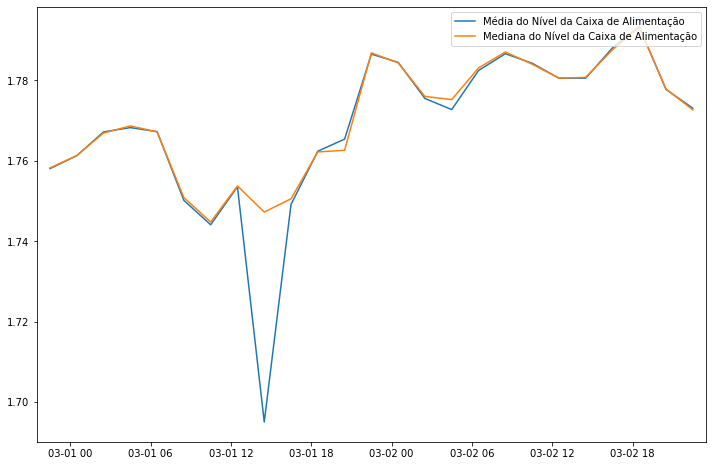

In [41]:
x = np.asarray(target.DataHora)
y = np.asarray(target.Ferro)

fig, axes = plt.subplots(1, 1, figsize=(12, 8))
ax = axes


# round to nearest years.
#datemin = np.datetime64(x[0], 'D') - np.timedelta64(1, 'h')
datemin = np.datetime64(x[0]) - np.timedelta64(1, 'h')
#datemax = np.datetime64(x[-1], 'D') + np.timedelta64(4, 'h')
datemax = np.datetime64(x[-1]) + np.timedelta64(1, 'h')
ax.set_xlim(datemin, datemax)

#ax.plot(x,y, label='Concentração de Ferro')
ax.plot(x,media, label='Média do Nível da Caixa de Alimentação')
ax.plot(x,mediana, label='Mediana do Nível da Caixa de Alimentação')

ax.legend(loc='upper right')

plt.show()

ValueError: x and y must have same first dimension, but have shapes (37,) and (25,)

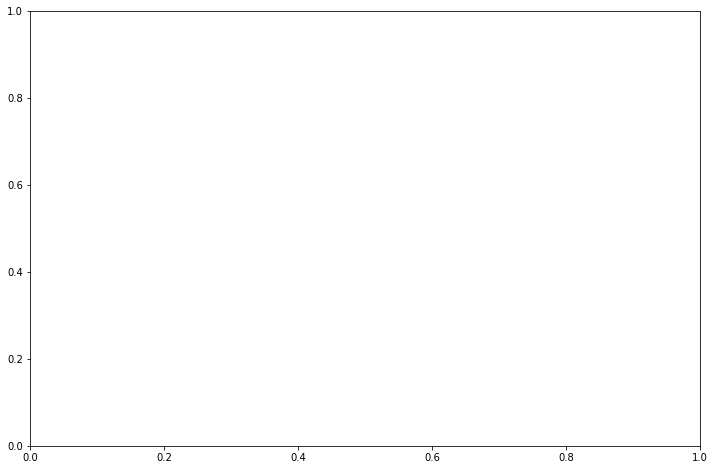

In [42]:
x = np.asarray(target.DataHora)
y = np.asarray(target.Ferro)

fig, axes = plt.subplots(1, 1, figsize=(12, 8))
ax = axes

ax.plot(list(range(1,38)), media, 'r', linewidth=2, label='Média do Nível da Caixa de Alimentação')
ax.plot(list(range(1,38)), mediana, 'black', linewidth=2, label='Mediana do Nível da Caixa de Alimentação')
ax.plot(list(range(1,38)), y, 'green', linewidth=2, label='Concentração de Ferro')

dados.boxplot(['Densidade'], by = 'gr', figsize=(18,8), ax=ax)

ax.legend(loc='lower right')

plt.show()

<IPython.core.display.Javascript object>


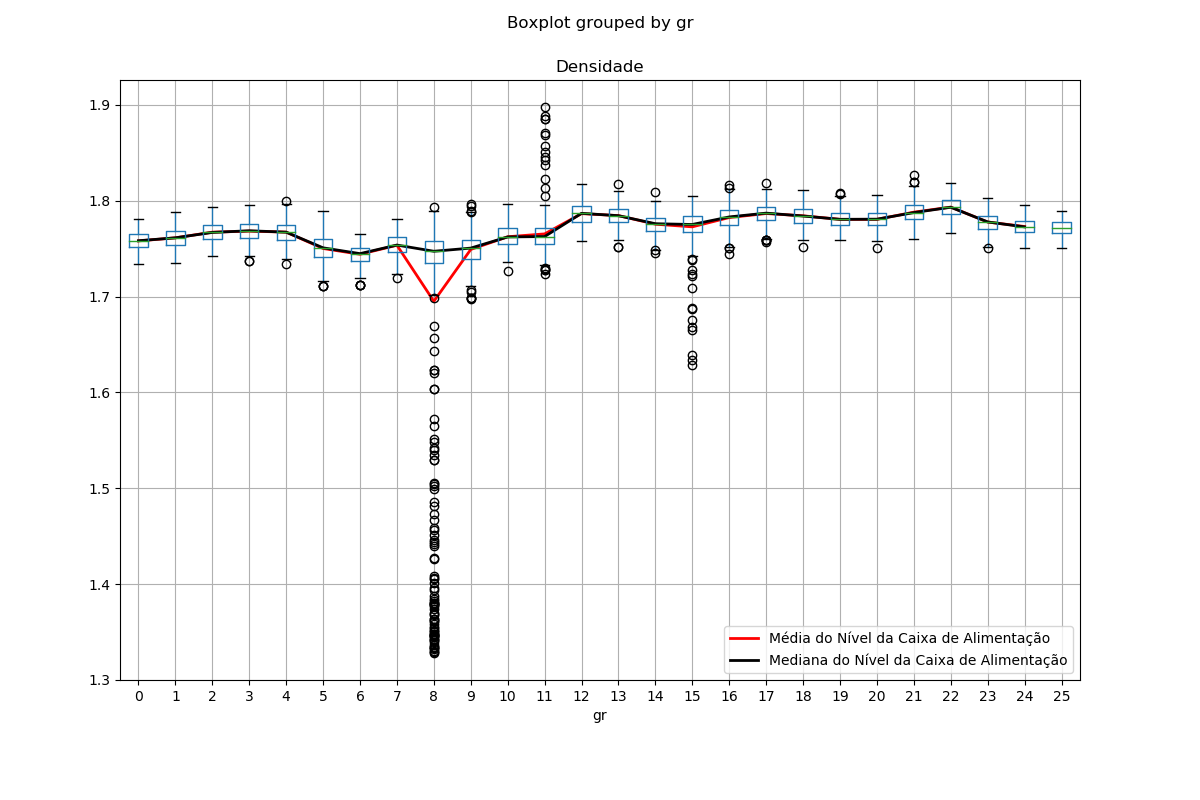

In [46]:
x = np.asarray(target.DataHora)
y = np.asarray(target.Ferro)

fig, axes = plt.subplots(1, 1, figsize=(12, 8))
ax = axes

ax.plot(list(range(1,26)), media, 'r', linewidth=2, label='Média do Nível da Caixa de Alimentação')
ax.plot(list(range(1,26)), mediana, 'black', linewidth=2, label='Mediana do Nível da Caixa de Alimentação')
#ax.plot(list(range(1,38)), y, 'green', linewidth=2, label='Concentração de Ferro')

dados.boxplot(['Densidade'], by = 'gr', figsize=(18,8), ax=ax)

ax.legend(loc='lower right')

plt.show()

### Testar fução **zip**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Create data
N = 60
g1 = (0.6 + 0.6 * np.random.rand(N), np.random.rand(N))
g2 = (0.4+0.3 * np.random.rand(N), 0.5*np.random.rand(N))
g3 = (0.3*np.random.rand(N),0.3*np.random.rand(N))

data = (g1, g2, g3)
colors = ("red", "green", "blue")
groups = ("coffee", "tea", "water")

# Create plot
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, axisbg="1.0")

for data, color, group in zip(data, colors, groups):
    x, y = data
    ax.scatter(x, y, alpha=0.8, c=color, edgecolors='none', s=30, label=group)

plt.title('Matplot scatter plot')
plt.legend(loc=2)
plt.show()